In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('diabetes1.csv')
data = data.drop(columns='Unnamed: 0',axis=0)

In [3]:
df = data.copy()

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
y = df['Outcome']
X = df.drop(columns='Outcome')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

In [9]:
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (614, 8)
train size y :  (614,)
test size X :  (154, 8)
test size y :  (154,)


In [10]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [11]:
y_train.value_counts(normalize=True)

Outcome
0    0.653094
1    0.346906
Name: proportion, dtype: float64

In [12]:
class_weight = {0: 1.530612244897959, 1: 2.8793103448275863}
model = LogisticRegression(class_weight=class_weight,solver='liblinear',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.530612244897959, 1: 2.8793103448275863},
                   max_iter=1000, solver='liblinear')

In [13]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, model.predict(X_test))
print("F1 score for the base model is:", f1)

F1 score for the base model is: 0.6341463414634145


In [14]:
from sklearn.model_selection import cross_val_score
k = 5  # You can choose a different number of folds
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)

Cross-validation scores: [0.74025974 0.69480519 0.76623377 0.82352941 0.77124183]
Mean Accuracy: 0.7592139886257533
Standard Deviation: 0.04204325428280857


In [15]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

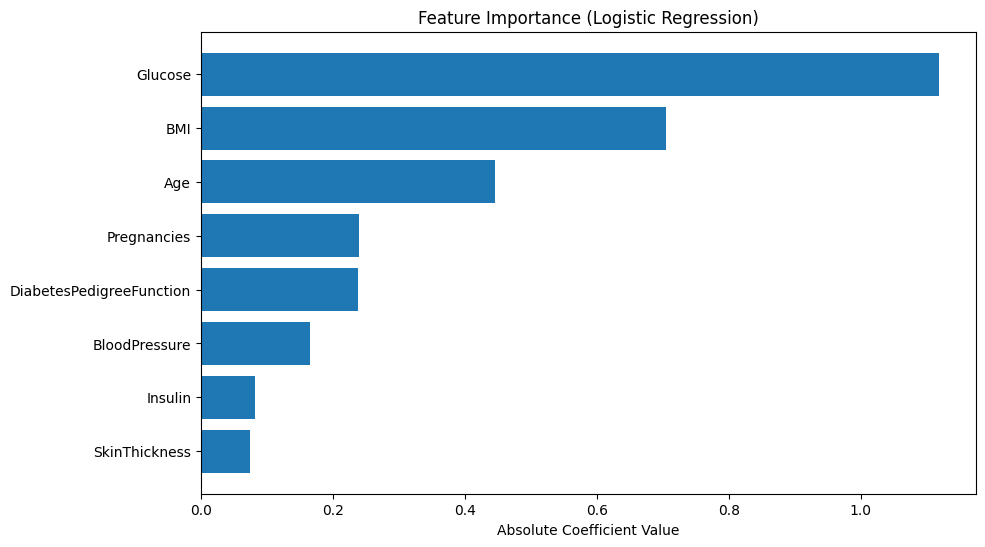

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model called 'model'
# and X_train contains your training feature matrix

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Calculate the absolute magnitude of coefficients
absolute_coefficients = np.abs(coefficients)

# Define feature names manually or access them from wherever you defined them
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']  # Replace with your actual feature names

# Sort feature names by absolute coefficient values (importance)
sorted_feature_names = [x for _, x in sorted(zip(absolute_coefficients, feature_names), reverse=True)]

# Sort the coefficients accordingly
sorted_coefficients = np.sort(absolute_coefficients)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

### Training with top 5 important columns

In [17]:
Z =  df[['Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction']]
q = df['Outcome']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(Z,q,random_state=42,train_size=0.8)

In [19]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [20]:
y_train.value_counts(normalize=True)

Outcome
0    0.653094
1    0.346906
Name: proportion, dtype: float64

In [21]:
class_weight = {0: 1.530612244897959, 1: 2.8793103448275863}
model = LogisticRegression(class_weight=class_weight,solver='liblinear',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.530612244897959, 1: 2.8793103448275863},
                   max_iter=1000, solver='liblinear')

In [22]:
from sklearn.model_selection import cross_val_score
k = 5  # You can choose a different number of folds
scores = cross_val_score(model, Z, q, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)

Cross-validation scores: [0.73376623 0.73376623 0.74025974 0.82352941 0.76470588]
Mean Accuracy: 0.7592055003819709
Standard Deviation: 0.034120592538532314


In [33]:
input = np.array([[20,50,56,0,0.6]]).astype(np.float64)
ypred = model.predict(input)
ypred

array([1], dtype=int64)

import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)